In [12]:
#Importing libraries 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import seaborn as sns
from collections import Counter

In [4]:
#Read csv files into a pandas dataframe 
#Making a list of missing values types
missingValues = ["n/a", "na", " ", "__"]
data = pd.read_csv("./data/site_weather.csv", na_values = missingValues)

data.rename(columns = {'Unnamed: 0': 'Timestamp'}, inplace = True)
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.set_index('Timestamp', inplace=True)

#First few rows
data.head()

,air_temp_set_1,air_temp_set_2,dew_point_temperature_set_1d,relative_humidity_set_1,solar_radiation_set_1
Timestamp,,,,,
2018-01-01 00:00:00+00:00,11.565,11.465,8.120,79.585,66.290
2018-01-01 00:30:00+00:00,11.515,11.460,8.160,80.060,36.525
2018-01-01 01:00:00+00:00,11.030,11.080,8.015,81.850,4.130
2018-01-01 01:30:00+00:00,10.750,10.785,7.975,83.150,0.120
2018-01-01 02:00:00+00:00,10.785,10.835,7.975,82.950,0.000


In [5]:
#Total missing values for each feature 
print("-------------Here are the missing values----------")
data.isnull().sum()

-------------Here are the missing values----------


air_temp_set_1                  107
air_temp_set_2                  127
dew_point_temperature_set_1d    167
relative_humidity_set_1         119
solar_radiation_set_1           122
dtype: int64

In [6]:
# -------- Removing Missing Values-----#

data = data.dropna()
print("-------------Here are the missing values----------")
data.isnull().sum()

-------------Here are the missing values----------


air_temp_set_1                  0
air_temp_set_2                  0
dew_point_temperature_set_1d    0
relative_humidity_set_1         0
solar_radiation_set_1           0
dtype: int64

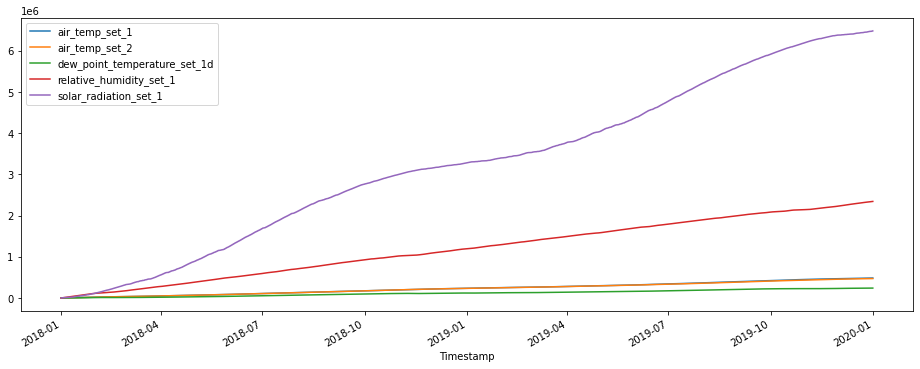

In [7]:
#--------Unormalized----------#
fig, ax = plt.subplots(figsize=(16, 6))
df = data.cumsum()
for col in df.columns:
    df[col] = df[col].astype('float64')    
    df.plot(y=col, use_index=True, ax=ax)
plt.show()

In [13]:
# --------- Normalized-------#
scaler = MinMaxScaler()
data_norm = df.copy()
data_norm[:] = scaler.fit_transform(data_norm)
data_norm.head(1)

,air_temp_set_1,air_temp_set_2,dew_point_temperature_set_1d,relative_humidity_set_1,solar_radiation_set_1
Timestamp,,,,,
2018-01-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0


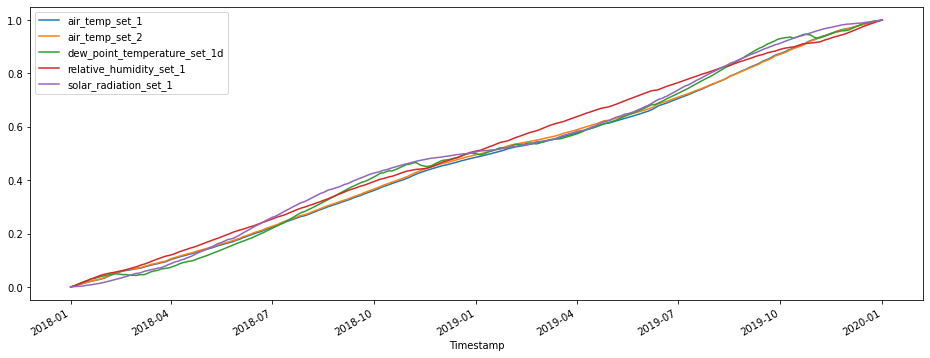

In [14]:
# Plot each feature (normalized) vs time
fig, ax = plt.subplots(figsize=(16, 6))
for col in data_norm.columns:
    data_norm[col] = data_norm[col].astype('float64')    
    data_norm.plot(y=col, use_index=True, ax=ax)
plt.show()

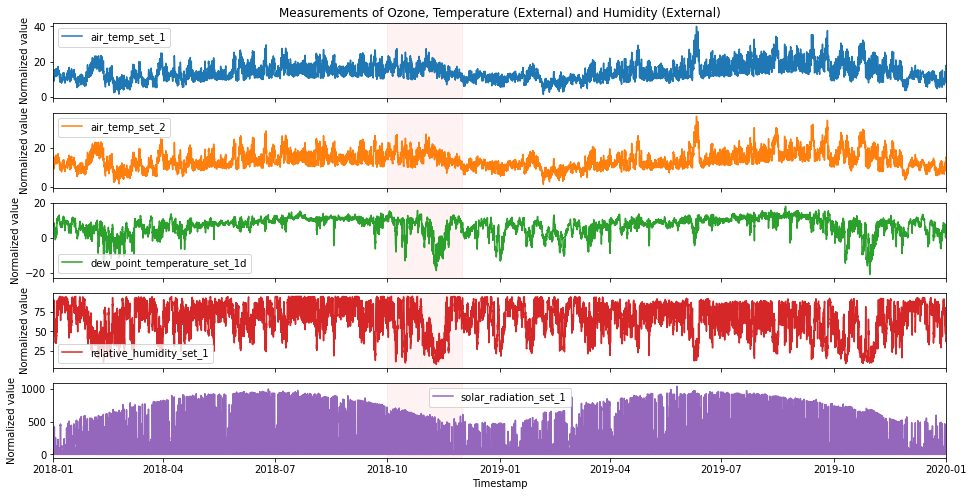

In [15]:
# --------- Unormalized-------#


fig, axs = plt.subplots(5, 1, sharex=True, figsize=(16, 8))
cols = [0, 1, 2, 3, 4]
colors = ['tab:blue', 'tab:orange', 'tab:green' ,'tab:red','tab:purple']
for i in range(5):
    ax = axs[i]
    col = data.columns[cols[i]]
    ax.plot(data.index, data[col], color=colors[i], label=col)
    ax.set_ylabel('Normalized value')
    ax.set_xlim([data.index[0], data.index[-1]])
    ax.legend()
    ax.axvspan('2018-10-01 00:30:00+00:00', '2018-12-01 00:30:00+00:00', alpha=0.05, color='red')
#     ax.axvspan('2020-05-29 18:00:00-04:00', '2020-06-01 8:00:00-04:00', alpha=0.05, color='red')
axs[0].set_title('Measurements of Ozone, Temperature (External) and Humidity (External)')
plt.xlabel('Timestamp')
plt.show()

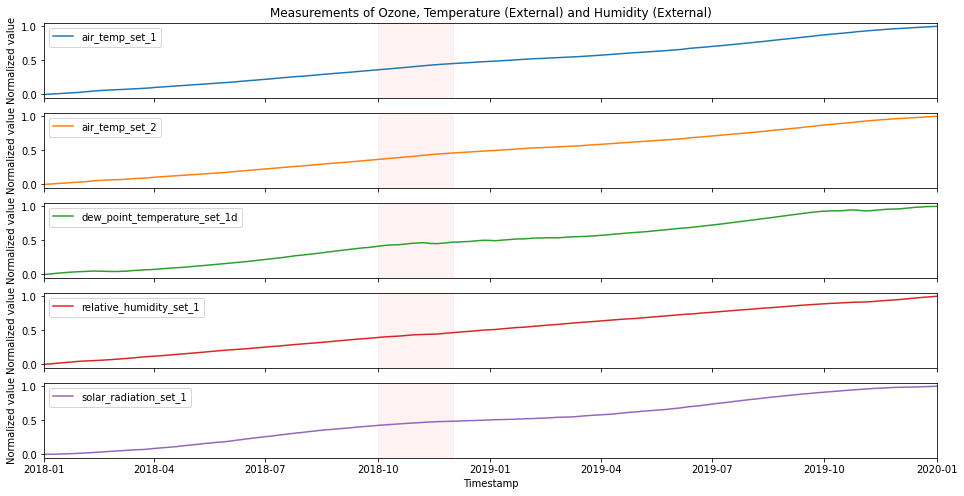

In [16]:
# --------- Normalized-------#


fig, axs = plt.subplots(5, 1, sharex=True, figsize=(16, 8))
cols = [0, 1, 2, 3, 4]
colors = ['tab:blue', 'tab:orange', 'tab:green' ,'tab:red','tab:purple']
for i in range(5):
    ax = axs[i]
    col = data_norm.columns[cols[i]]
    ax.plot(data_norm.index, data_norm[col], color=colors[i], label=col)
    ax.set_ylabel('Normalized value')
    ax.set_xlim([data_norm.index[0], data_norm.index[-1]])
    ax.legend()
    ax.axvspan('2018-10-01 00:30:00+00:00', '2018-12-01 00:30:00+00:00', alpha=0.05, color='red')
#     ax.axvspan('2020-05-29 18:00:00-04:00', '2020-06-01 8:00:00-04:00', alpha=0.05, color='red')
axs[0].set_title('Measurements of Ozone, Temperature (External) and Humidity (External)')
plt.xlabel('Timestamp')
plt.show()

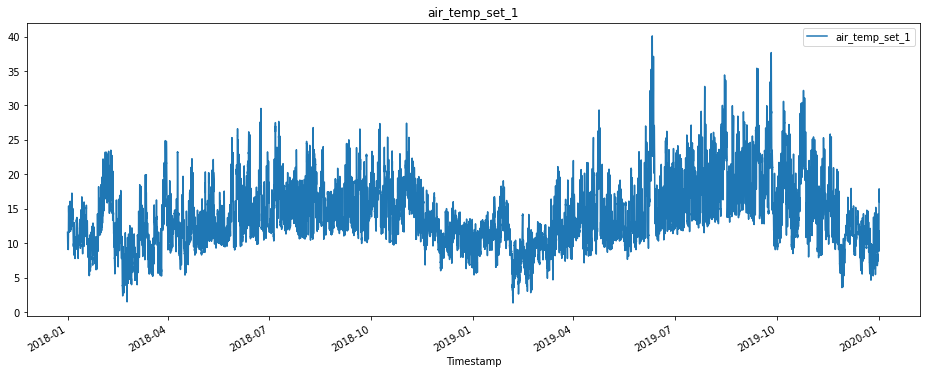

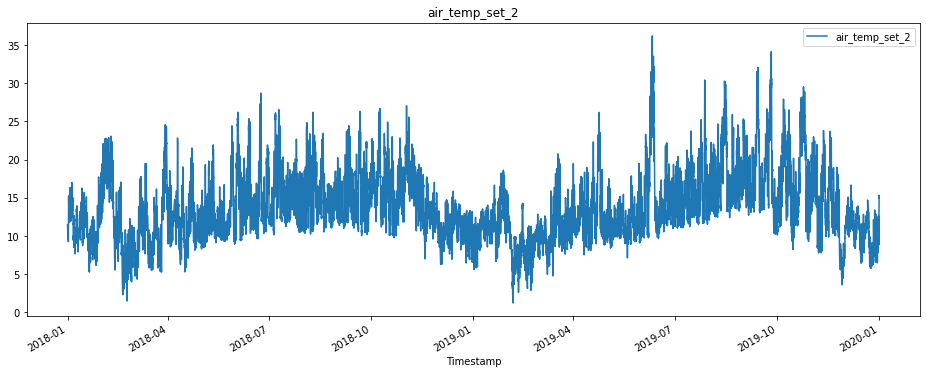

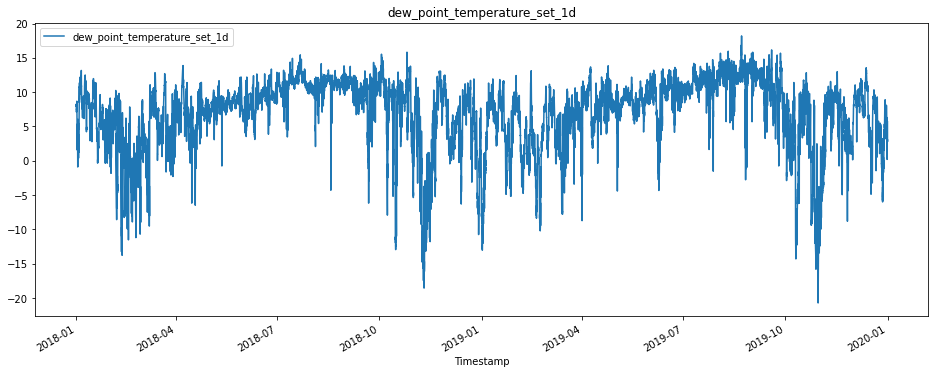

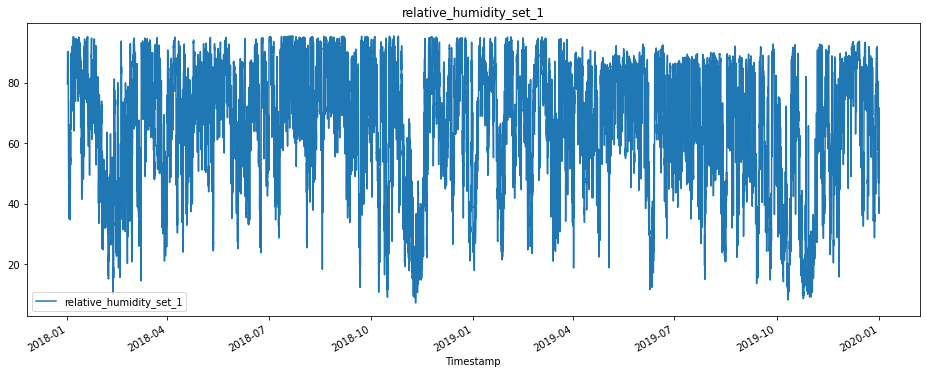

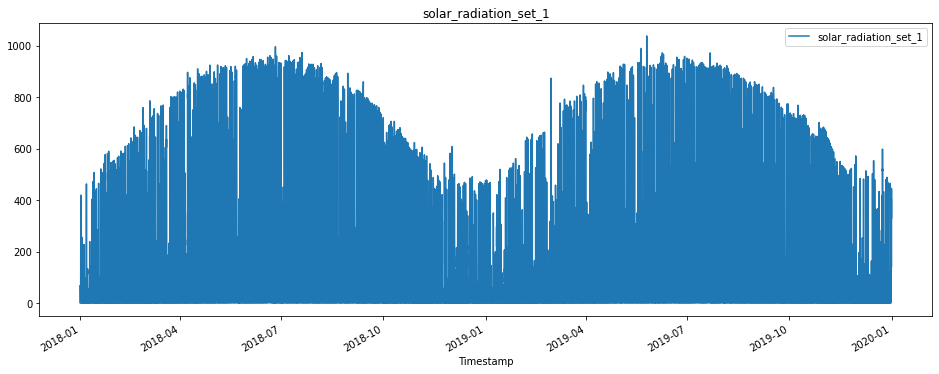

In [17]:
for col in data.columns:
    fig, ax = plt.subplots(figsize=(16, 6))
    data.plot(y=col, use_index=True, ax=ax)
    ax.set_title(col)
plt.show()

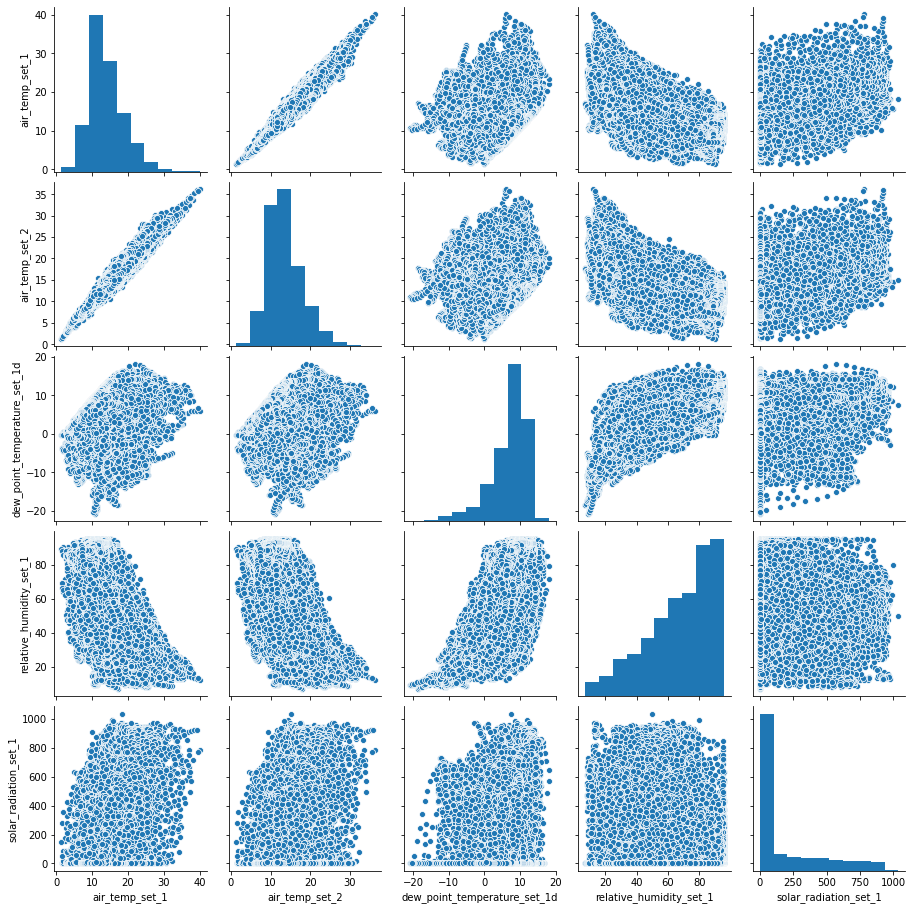

In [18]:
df = data.iloc[:, [0,1,2,3,4]]
sns.pairplot(data)
# plt.title("Scatter Matrix of Selected Features")
plt.show()

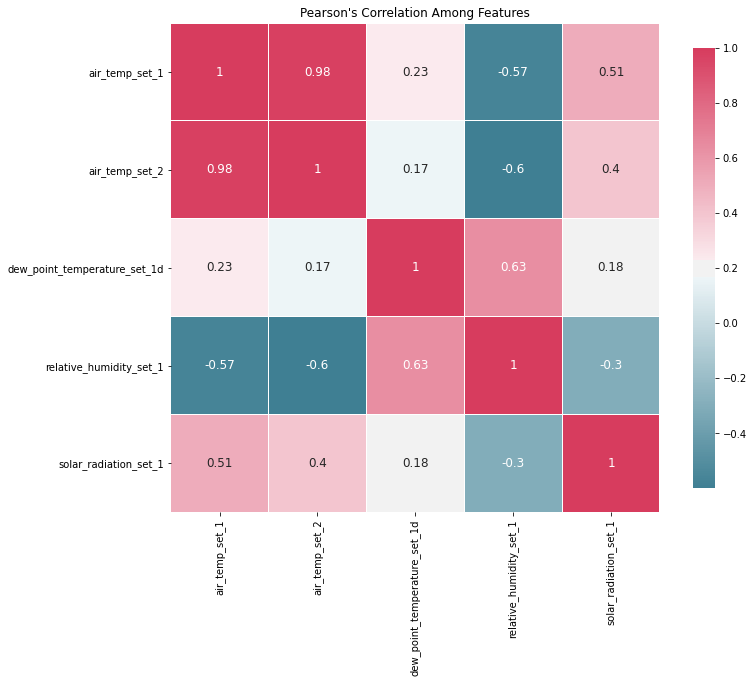

In [20]:

fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(
        data.corr(), 
        cmap = sns.diverging_palette(220, 4, as_cmap = True),  
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 })
plt.title("Pearson's Correlation Among Features")
plt.show()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

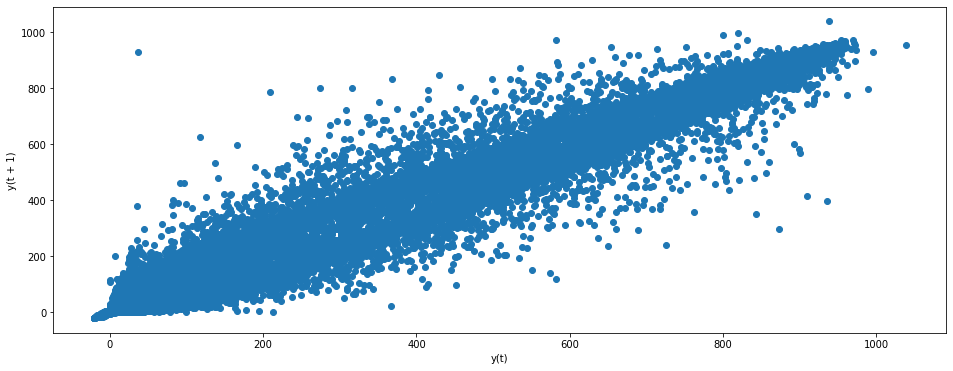

In [21]:
# ------Lag plot for finding the randomness in data------#
#-----Unormalized-----#

from pandas.plotting import lag_plot
import random as rand
plt.figure(figsize=(16, 6))
# data = pd.Series(0.1 * rand.randint(1,1000) + 0.9 * np.sin(np.linspace(-99 * np.pi, 99 * np.pi, num=1000)))
lag_plot(data)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

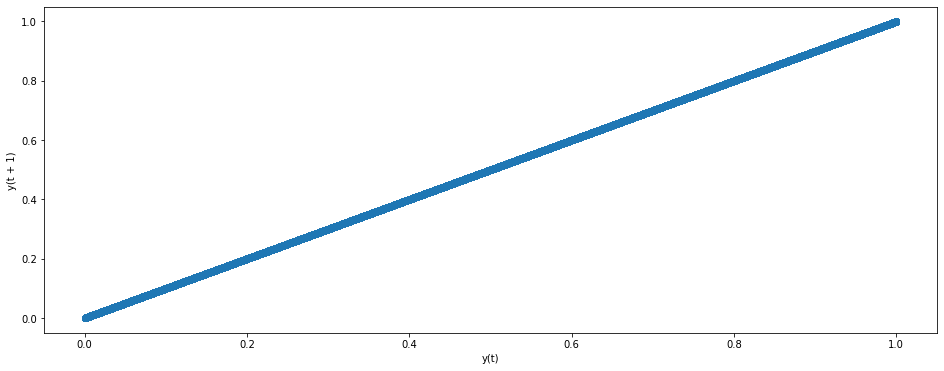

In [22]:
# ------Lag plot for finding the randomness in data------#
#-----Normalized-----#

from pandas.plotting import lag_plot
import random as rand
plt.figure(figsize=(16, 6))
# data = pd.Series(0.1 * rand.randint(1,1000) + 0.9 * np.sin(np.linspace(-99 * np.pi, 99 * np.pi, num=1000)))
lag_plot(data_norm)


array([[<AxesSubplot:xlabel='air_temp_set_1', ylabel='air_temp_set_1'>,
        <AxesSubplot:xlabel='air_temp_set_2', ylabel='air_temp_set_1'>,
        <AxesSubplot:xlabel='dew_point_temperature_set_1d', ylabel='air_temp_set_1'>,
        <AxesSubplot:xlabel='relative_humidity_set_1', ylabel='air_temp_set_1'>,
        <AxesSubplot:xlabel='solar_radiation_set_1', ylabel='air_temp_set_1'>],
       [<AxesSubplot:xlabel='air_temp_set_1', ylabel='air_temp_set_2'>,
        <AxesSubplot:xlabel='air_temp_set_2', ylabel='air_temp_set_2'>,
        <AxesSubplot:xlabel='dew_point_temperature_set_1d', ylabel='air_temp_set_2'>,
        <AxesSubplot:xlabel='relative_humidity_set_1', ylabel='air_temp_set_2'>,
        <AxesSubplot:xlabel='solar_radiation_set_1', ylabel='air_temp_set_2'>],
       [<AxesSubplot:xlabel='air_temp_set_1', ylabel='dew_point_temperature_set_1d'>,
        <AxesSubplot:xlabel='air_temp_set_2', ylabel='dew_point_temperature_set_1d'>,
        <AxesSubplot:xlabel='dew_point_tempera

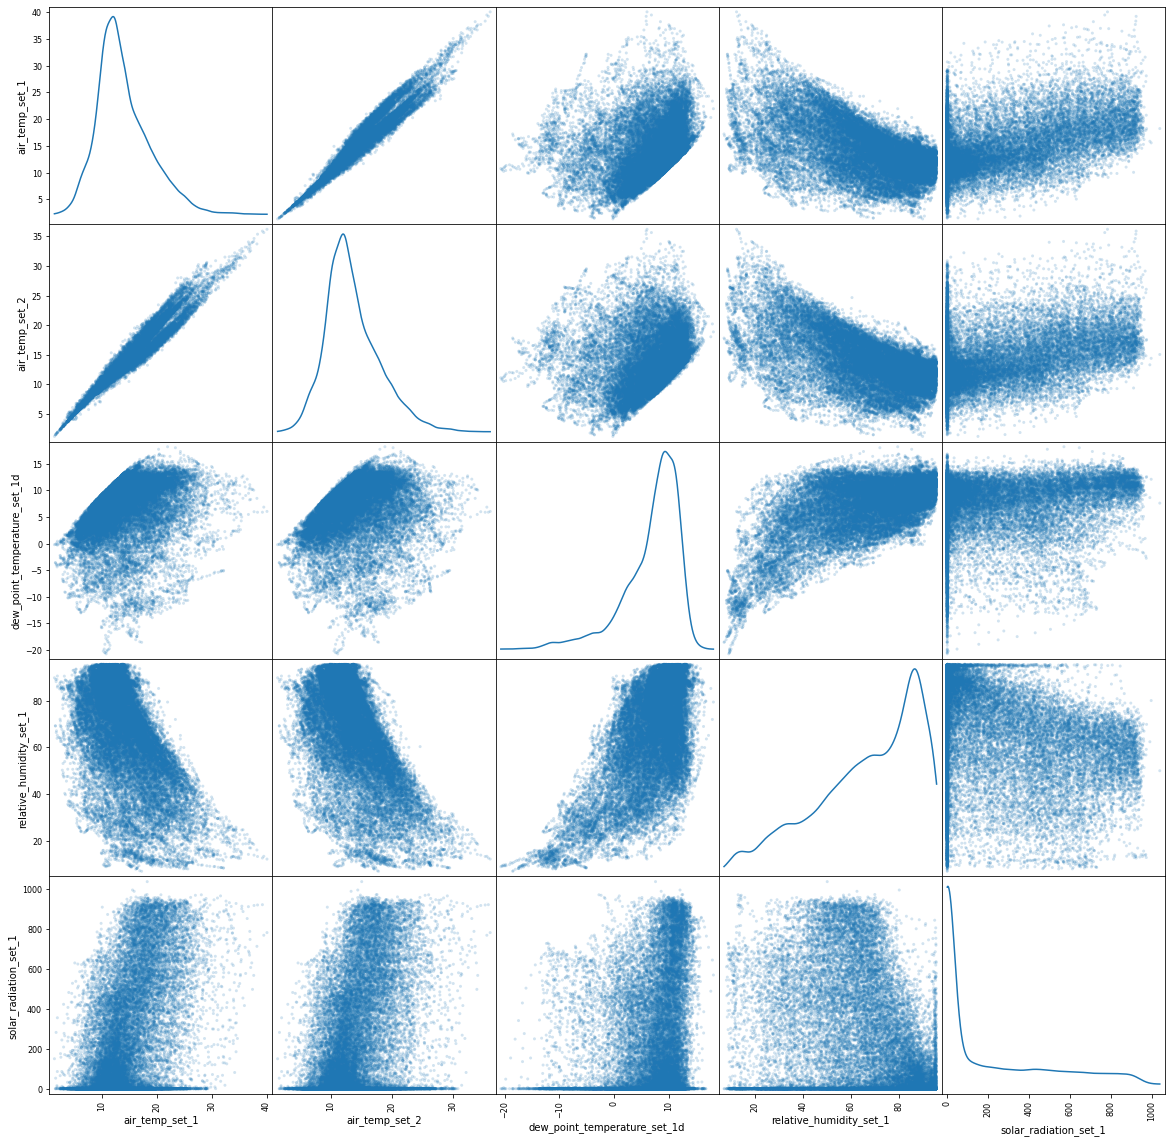

In [23]:
#------Scatter plot matrix------#
#-----Unormalized-----#
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize=(20, 20), diagonal='kde')

array([[<AxesSubplot:xlabel='air_temp_set_1', ylabel='air_temp_set_1'>,
        <AxesSubplot:xlabel='air_temp_set_2', ylabel='air_temp_set_1'>,
        <AxesSubplot:xlabel='dew_point_temperature_set_1d', ylabel='air_temp_set_1'>,
        <AxesSubplot:xlabel='relative_humidity_set_1', ylabel='air_temp_set_1'>,
        <AxesSubplot:xlabel='solar_radiation_set_1', ylabel='air_temp_set_1'>],
       [<AxesSubplot:xlabel='air_temp_set_1', ylabel='air_temp_set_2'>,
        <AxesSubplot:xlabel='air_temp_set_2', ylabel='air_temp_set_2'>,
        <AxesSubplot:xlabel='dew_point_temperature_set_1d', ylabel='air_temp_set_2'>,
        <AxesSubplot:xlabel='relative_humidity_set_1', ylabel='air_temp_set_2'>,
        <AxesSubplot:xlabel='solar_radiation_set_1', ylabel='air_temp_set_2'>],
       [<AxesSubplot:xlabel='air_temp_set_1', ylabel='dew_point_temperature_set_1d'>,
        <AxesSubplot:xlabel='air_temp_set_2', ylabel='dew_point_temperature_set_1d'>,
        <AxesSubplot:xlabel='dew_point_tempera

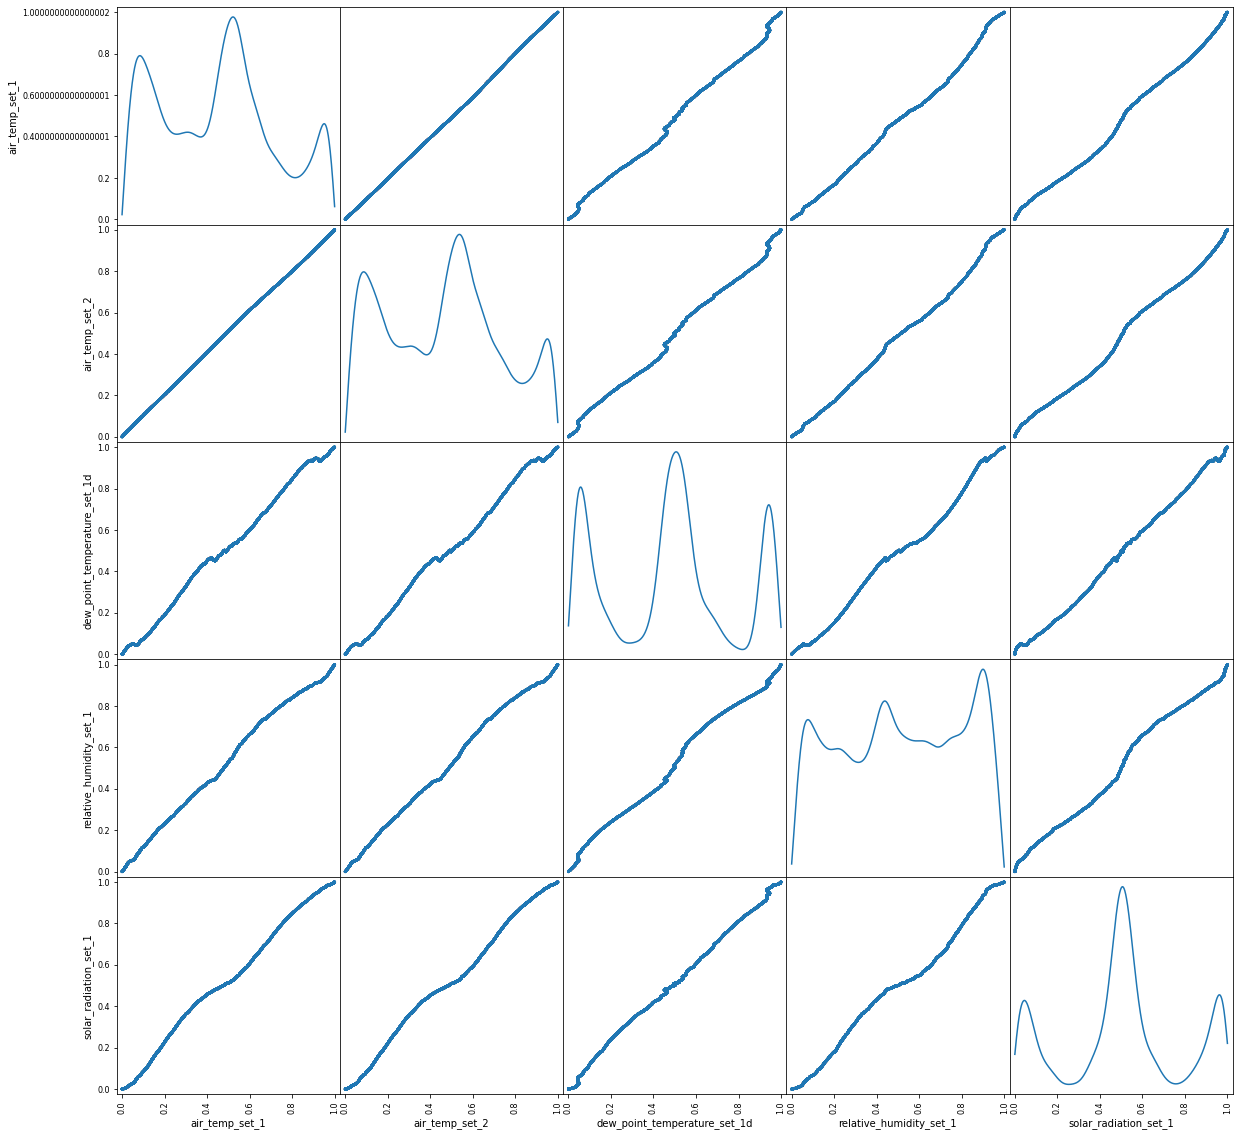

In [24]:
#------Scatter plot matrix------#
#-----Normalized-----#
from pandas.plotting import scatter_matrix
scatter_matrix(data_norm, alpha=0.2, figsize=(20, 20), diagonal='kde')

<AxesSubplot:ylabel='Density'>

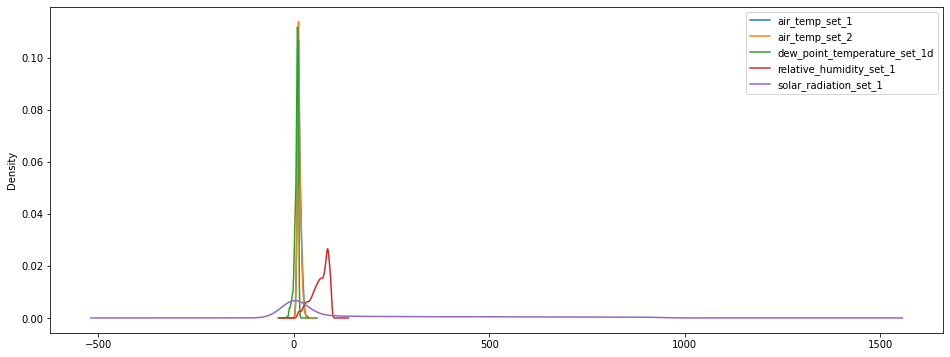

In [25]:
# ------ Density-----#
#-----Unormalized -----#
ser = data
# plt.figure(figsize=(16, 6))
ser.plot(kind='kde',figsize=(16, 6))

<AxesSubplot:ylabel='Density'>

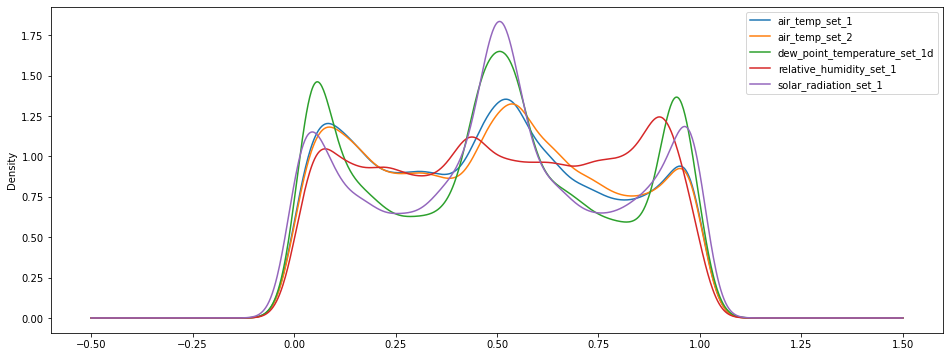

In [26]:
# ------ Density-----#
#------ Normalized----#
ser = data_norm
# plt.figure(figsize=(16, 6))
ser.plot(kind='kde',figsize=(16, 6))